In [4]:
import numpy as np
import pandas as pd
import os

In [75]:
datapath = os.path.join("data", "")

In [76]:
oecd = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd = oecd[oecd.INEQUALITY == "TOT"]
oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")
oecd

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [77]:
gdp = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp.rename(columns={"2015": "gdp_per_capita"}, inplace = True)
gdp.index = gdp.Country
gdp

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,gdp_per_capita,Estimates Start After
Country,,,,,,,
Afghanistan,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
Argentina,Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
Armenia,Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
Australia,Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0


In [103]:
LifeSat_Gdp = pd.merge(left=oecd[['Life satisfaction']],
                       right=gdp[['gdp_per_capita']],
                       left_index=True, right_index=True
                      )
LifeSat_Gdp.rename(columns={'Life satisfaction': 'LifeSat',
                            'gdp_per_capita': 'Gdp'
                           },
                   inplace = True
                  )
LifeSat_Gdp.drop(['Brazil', 'Mexico', 'Chile', 'Czech Republic', 'Norway', 'Switzerland', 'Luxembourg'],
                 inplace=True
                )

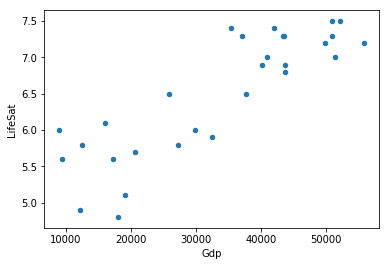

In [125]:
import matplotlib.pyplot as plt
LifeSat_Gdp.plot(x='Gdp', y='LifeSat', kind='scatter')
plt.show()

In [117]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

y = np.array(LifeSat_Gdp.iloc[:,0]).reshape(-1,1)
X = np.array(LifeSat_Gdp.iloc[:,1]).reshape(-1,1)

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

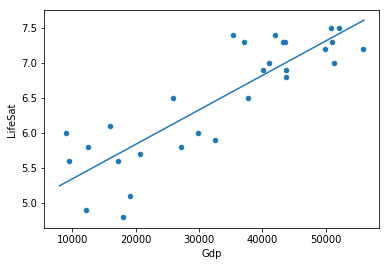

In [126]:
LifeSat_Gdp.plot(x='Gdp', y='LifeSat', kind='scatter')
xp = np.linspace(8000, 56000, 2).reshape(-1,1)
yp = model.predict(xp)
plt.plot(xp, yp)
plt.show()

In [130]:
model.coef_, model.intercept_

(array([[4.91154459e-05]]), array([4.8530528]))

In [146]:
Cyprus_gdp = gdp.loc["Cyprus"].gdp_per_capita
Cyprus_lifesat_estim = model.predict(gdp.loc["Cyprus"].gdp_per_capita)
Cyprus_gdp, Cyprus_lifesat_estim

(22587.49, array([[5.96244744]]))

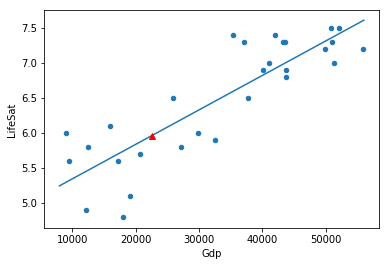

In [153]:
LifeSat_Gdp.plot(x='Gdp', y='LifeSat', kind='scatter')
xp = np.linspace(8000, 56000, 2).reshape(-1,1)
yp = model.predict(xp)
plt.plot(xp, yp)
plt.plot(Cyprus_gdp, Cyprus_lifesat_estim, 'r^')
plt.show()